In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch 
import torchvision as tv
import torch.nn as nn 
from torch.utils.data import Dataset
import pandas as pd
import os
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import tqdm
from skimage import io

In [15]:
dataset_path = 'dataset/train'
images_path = os.path.join(dataset_path, 'images')
masks_path = os.path.join(dataset_path, 'masks')
df = pd.read_csv('dataset/train.csv')
output_path = 'output'


In [50]:
#### Function to show 3 images
def show_triple(img1, img2, img3, title1, title2, title3):
        fig, axis = plt.subplots(1,3, figsize = (10,8))
        img1 = io.imread(img1)
        img2 = io.imread(img2)
        img3 = io.imread(img3)
        print(img1.shape)

        if len(img1.shape) < 3:
                cmap = 'gray'
        axis[0].imshow(img1, cmap = cmap)
        axis[1].imshow(img2, cmap = cmap)
        axis[2].imshow(img3, cmap = cmap)
        axis[0].axis('off')
        axis[1].axis('off')
        axis[2].axis('off')
        axis[0].set_title(title1)
        axis[1].set_title(title2)
        axis[2].set_title(title3)
        plt.show()
       


(101, 101)


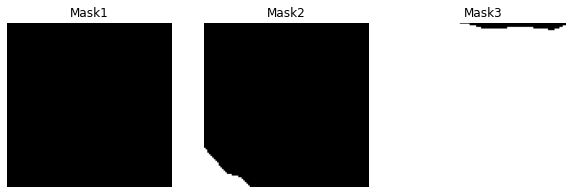

In [51]:
## Display sample Image

sample_masks = os.listdir(masks_path)
sample_imgs = os.listdir(images_path)
mask_paths = [os.path.join(masks_path,i) for i in sample_masks[0:3]]
img_paths = [os.path.join(images_path,i) for i in sample_imgs[0:3]]
#show_triple(*img_paths, "Im1", "Im2", "Im3")
show_triple(*mask_paths, "Mask1", "Mask2", "Mask3")



0
1
2
3


In [21]:
from torchvision import transforms
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader
from dataset import segmentationdataset
import matplotlib.pyplot as plt
from imutils.paths import list_images
import time 
import os
from tqdm import tqdm
#Torch
import torch
from torch.utils.data import DataLoader

from torch.nn import BCEWithLogitsLoss
from torch.optim import Adam
from main_network import UNET
from options import *
img_paths = sorted(list(list_images(images_path)))
mask_paths = sorted(list(list_images(masks_path)))

train_imgs,test_imgs,train_masks,test_masks = train_test_split(img_paths, 
                                                    mask_paths, test_size=test_split,
                                                    random_state = 42)


# Initialize the transforms
transform = transforms.Compose([transforms.ToPILImage(),
                                    transforms.Resize(img_size),
                                    transforms.ToTensor()])

    # Initialize the dataset
train_dataset = segmentationdataset(img_paths=train_imgs, mask_paths = train_masks, 
                                        transforms=transform)

test_dataset = segmentationdataset(img_paths=test_imgs, mask_paths= test_masks,
                                    transforms = transform)

    # Create DataLoader
train_DL = DataLoader(train_dataset, batch_size = 8, shuffle = False, num_workers=os.cpu_count())
test_DL =  DataLoader(test_dataset,  batch_size = 8, shuffle = False,num_workers=os.cpu_count())

    #Initialize the network
model = UNET().to(device)

    #initialize loss function
criterion = BCEWithLogitsLoss()
optimizer = Adam(model.parameters(), lr = lr)




for (i, (imgs, masks)) in enumerate(train_DL):
    print(type(imgs))
    print(type(masks))
print("Done")    
    

KeyboardInterrupt: 